# Classifying Cardiovascular Diseases in a Simple Way!

### Introduction

Cardiovascular diseases (CVDs) collectively describe a group of disorders involving the heart and the blood vessels surrounding it. CVDs correlate with age, hereditary diseases (ex. type 2 diabetes, thalassemia), and with unhealthy behaviors such as smoking, little physical exercise, and excessive alcohol consumption. Research in CVDs have been a great deal of interest as it is estimated that 17.9 million lives are claimed by CVDs annually worldwide. 

Common tests to diagnose CVDs include blood work, electrocardiogram, ambulatory monitoring, cardiac CTs and MRIs, and stress tests. However, an accurate diagnosis still require much manual analysis integrating laboratory results and patient information. Thus, manual diagnosis can be complex and time consuming while depending on the physicians' knowledge and experience. 

The accuracy for diagnosing CVDs could suffer even further in facilities with limited resources. One can imagine that a lack of diagnostic machines, staff, and medical experience could result in poorer correct diagnosis of heart patients. Here, we explore whether a classifier that consumes simple predictors (gathered without advanced machineries and high medical experience) could accurately predict the presence of cardiovascular diseases in patients.

The datasets which we will use to develop our AI model are taken from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). The data was collected from patients in the following locations:

1. Cleveland Clinic Foundation
2. Hungarian Institute of Cardiology, Budapest
3. V.A. Medical Center, Long Beach, CA
4. University Hospital, Zurich, Switzerland

Each location compiled a separate database that contains 76 recorded attributes for each individual in their list of heart patients. For our purposes, we are going to focus on a subset of 7 attributes from a combined dataset from all four locations. The 7 attributes are as follows:

1. `age` - age of patients
2. `sex` - sex of patients
3. `exang` - exercised induced angina. Angina is a type of chest pain caused by reduced blood flow to the heart.
4. `oldpeak` - an electrocardiogram measurement (ST depression induced by exercise relative to rest).
5. `slope` - an electrocardiogram measurement (slope of the peak exercise ST segment).
6. `thal` - thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. 
7. `num` - categorization of the severity of CVD in 0 to 4, with "0" being free of CVD.

In [1]:
#Loading Packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Loading the Data
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
hungarian_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
switzerland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
va_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

In [3]:
#Adding an origin category for each row
cleveland_data <- mutate(cleveland_data, Origin = "cleveland")
hungarian_data <- mutate(hungarian_data, Origin = "hungarian")
switzerland_data <- mutate(switzerland_data, Origin = "switzerland")
va_data <- mutate(va_data, Origin = "longbeach")

#Combining the data into a mega data set
heart_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)

#Creating names for each column
column_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exercise_induced_angina", "st_depression", "st_segment_slope", "ca", "thalassemia", "presence_of_cvd", "origin")

#Adding names to columns
colnames(heart_data) <- column_names
head(heart_data)

#Selecting the columns of interest
heart_data <- heart_data |> select(age, sex, exercise_induced_angina, st_depression, st_segment_slope, thalassemia, presence_of_cvd, origin)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exercise_induced_angina,st_depression,st_segment_slope,ca,thalassemia,presence_of_cvd,origin
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,cleveland
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,cleveland
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,cleveland


### Tidying the Data



In [4]:
#Removing all rows that with missing variable(s)
tidy_data <- heart_data |> filter(exercise_induced_angina != "?" & st_depression != "?" & st_segment_slope != "?" & thalassemia != "?")

#Combining heart severity levels 1 to 4 into one measurement and converting variables in presence_of_cvd into "Yes" or "No"
severity_1_to_4 <- tidy_data |> filter(presence_of_cvd != 0) |> mutate(presence_of_cvd = "Yes")
tidy_data <- tidy_data |> filter(presence_of_cvd == 0) |> mutate(presence_of_cvd = "No") |> rbind(severity_1_to_4)

#Converting variables in sex into "M" or "F"
males <- tidy_data |> filter(sex != 0) |> mutate(sex = "M")
tidy_data <- tidy_data |> filter(sex == 0) |> mutate(sex = "F") |> rbind(males)

#Converting variables in exercise_induced_angina into "No" or "Yes"
not_induced <- tidy_data |> filter(exercise_induced_angina == 0) |> mutate(exercise_induced_angina = "No")
tidy_data <- tidy_data |> filter(exercise_induced_angina == 1) |> mutate(exercise_induced_angina = "Yes") |> rbind(not_induced)

#Converting  variables in thalassemia into more intuitive variables
tidy_data <- tidy_data |> mutate(thalassemia = as.character(thalassemia))
no_presence <- tidy_data |> filter(thalassemia == "3" | thalassemia == "3.0") |> mutate(thalassemia = "No Presence")
fixed_defect <- tidy_data |> filter(thalassemia == "6" | thalassemia == "6.0") |> mutate(thalassemia = "Fixed Defect")
tidy_data <- tidy_data |> filter(thalassemia == "7" | thalassemia == "7.0") |> mutate(thalassemia = "Reversable Defect") |> rbind(no_presence, fixed_defect)

head(tidy_data)

age,sex,exercise_induced_angina,st_depression,st_segment_slope,thalassemia,presence_of_cvd,origin
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
51,F,Yes,1.2,2,Reversable Defect,Yes,cleveland
61,F,Yes,1,2,Reversable Defect,Yes,cleveland
43,F,Yes,3,2,Reversable Defect,Yes,cleveland
56,F,Yes,4,3,Reversable Defect,Yes,cleveland
56,F,Yes,1.9,2,Reversable Defect,Yes,cleveland
66,F,Yes,1,2,Reversable Defect,Yes,cleveland


In [5]:
#Creating training and testing data set. We decided on a 75-25 split and give the majority set as the training set to ensure 
set.seed(1)
split_data <- initial_split(tidy_data, prop = 0.75, strata = presence_of_cvd)
training_data <- training(split_data)
testing_data <- testing(split_data)

### Preliminary Exploratory Data Analysis

In [6]:
#Summary of number of rows in the mega data set, tidied data set, deleted rows from mega data set to create tidied data set, and training data set.
nrows_in_raw_dataset <- nrow(heart_data)
nrows_in_tidied_dataset <- nrow(tidy_data)
nrows_in_training_datatset <- nrow(training_data)
raw_stats <- data.frame(nrows_in_raw_dataset, nrows_in_tidied_dataset) |> 
    mutate(nrows_with_missing_data = nrows_in_raw_dataset - nrows_in_tidied_dataset) |>
    mutate(nrows_in_training_set = nrows_in_training_datatset)
raw_stats

#Summary of patients with CVD in training data set
training_stats <- training_data |> 
    group_by(presence_of_cvd) |> 
    count() |> 
    pivot_wider(names_from = presence_of_cvd, values_from = n) |> 
    rename(patients_with_CVD = No, patients_without_CVD = Yes) |> 
    mutate(total_count_in_training_data = nrows_in_training_datatset)
training_stats

#Summary of presence of CVD in training data grouped by patient origins
summary <- training_data |> 
    group_by(origin, presence_of_cvd) |> 
    count() |> 
    pivot_wider(names_from = presence_of_cvd, values_from = n) |> 
    rename(origin_in_training_data = origin, patients_with_CVD = No, patients_without_CVD = Yes)
summary

nrows_in_raw_dataset,nrows_in_tidied_dataset,nrows_with_missing_data,nrows_in_training_set
<int>,<int>,<int>,<int>
920,385,535,288


patients_with_CVD,patients_without_CVD,total_count_in_training_data
<int>,<int>,<int>
128,160,288


origin_in_training_data,patients_with_CVD,patients_without_CVD
<chr>,<int>,<int>
cleveland,122,107
hungarian,4,4
longbeach,1,10
switzerland,1,39


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



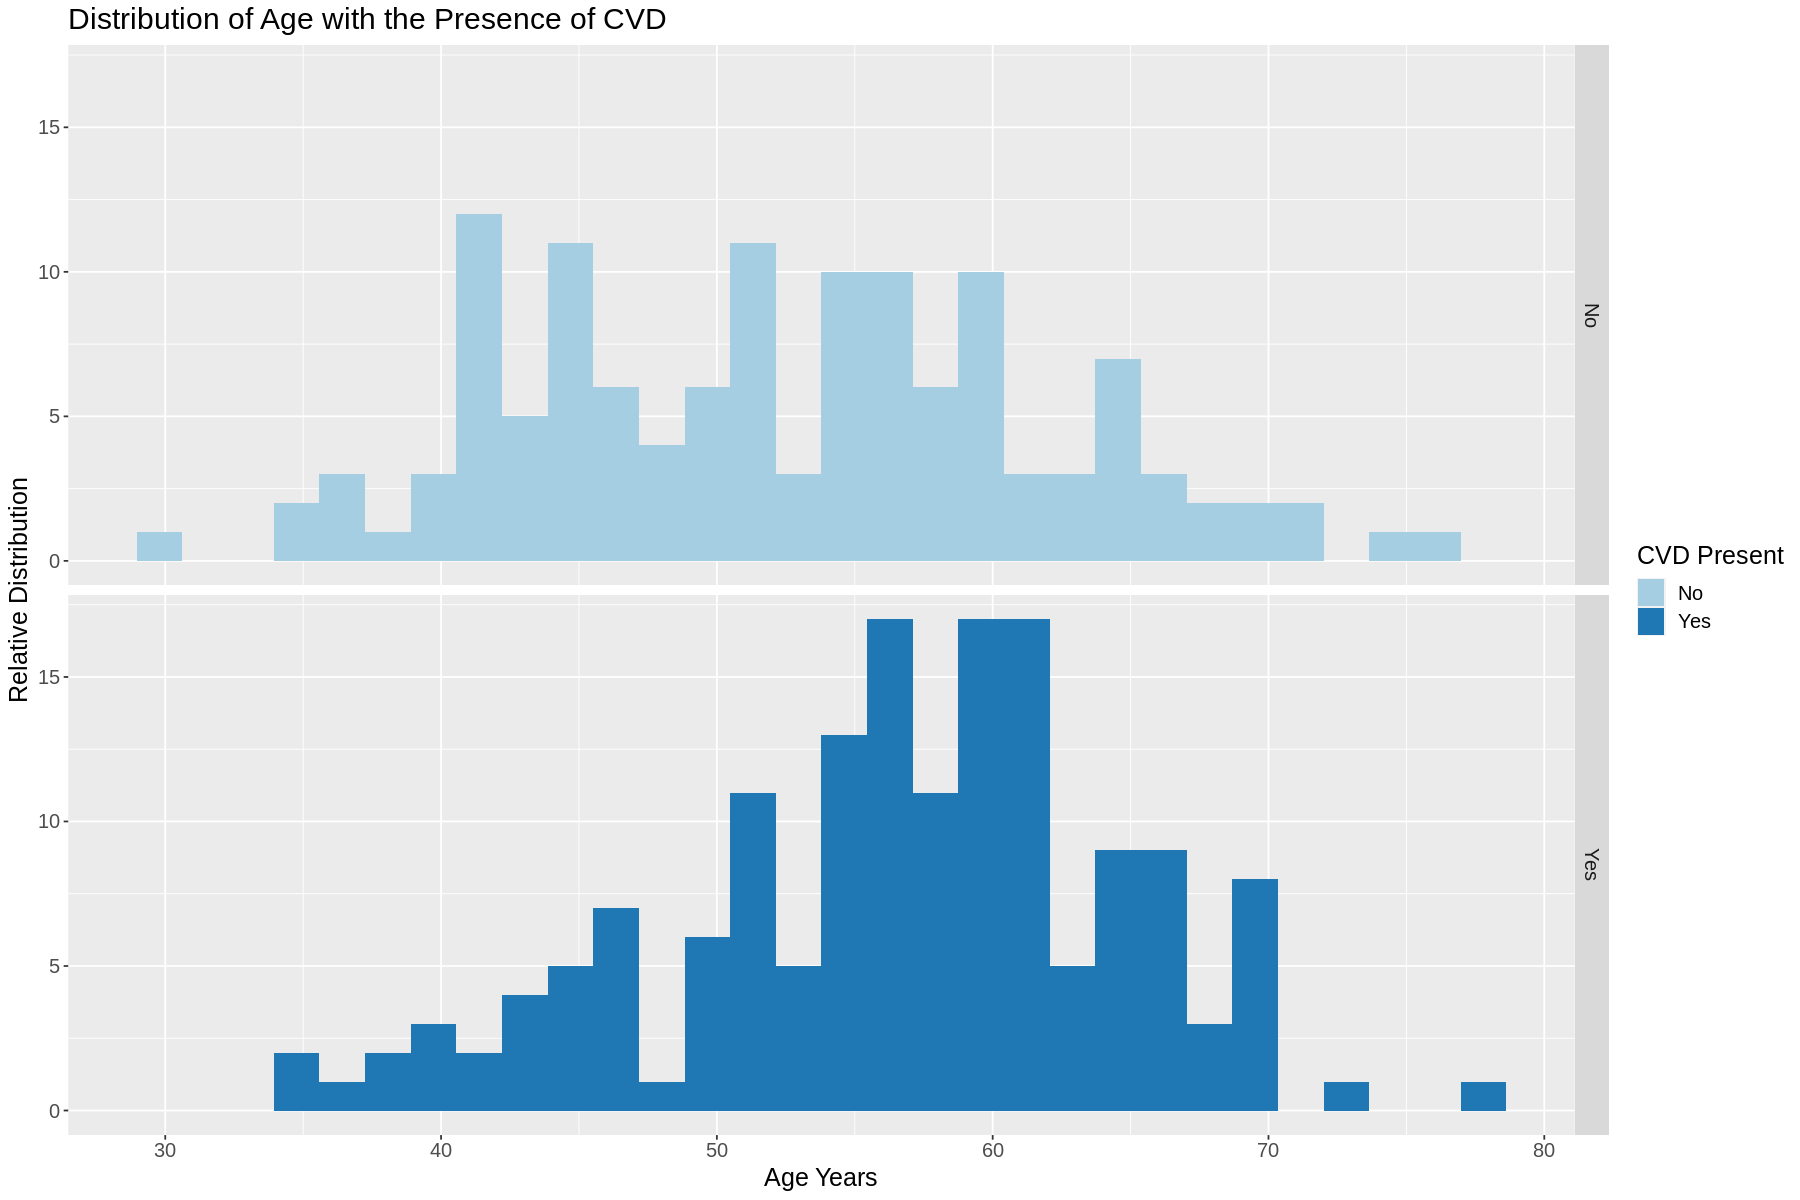

geom_freqpoly {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes() or aes_(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."
binwidth,"The width of the bins. Can be specified as a numeric value or as a function that calculates width from unscaled x. Here, ""unscaled x"" refers to the original x values in the data, before application of any scale transformation. When specifying a function along with a grouping structure, the function will be called once per group. The default is to use the number of bins in bins, covering the range of the data. You should always override this value, exploring multiple widths to find the best to illustrate the stories in your data. The bin width of a date variable is the number of days in each time; the bin width of a time variable is the number of seconds."
bins,Number of bins. Overridden by binwidth. Defaults to 30.
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."


In [27]:
options(repr.plot.width = 15, repr.plot.height = 10)
age_vs_pred <- training_data |>
    ggplot(aes(x = age, fill = as_factor(presence_of_cvd))) +
    geom_histogram() + 
    labs(x = "Age Years", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Age with the Presence of CVD") +
    scale_fill_brewer(palette = 'Paired') +
    facet_grid(rows = vars(presence_of_cvd))
age_vs_pred
?geom_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


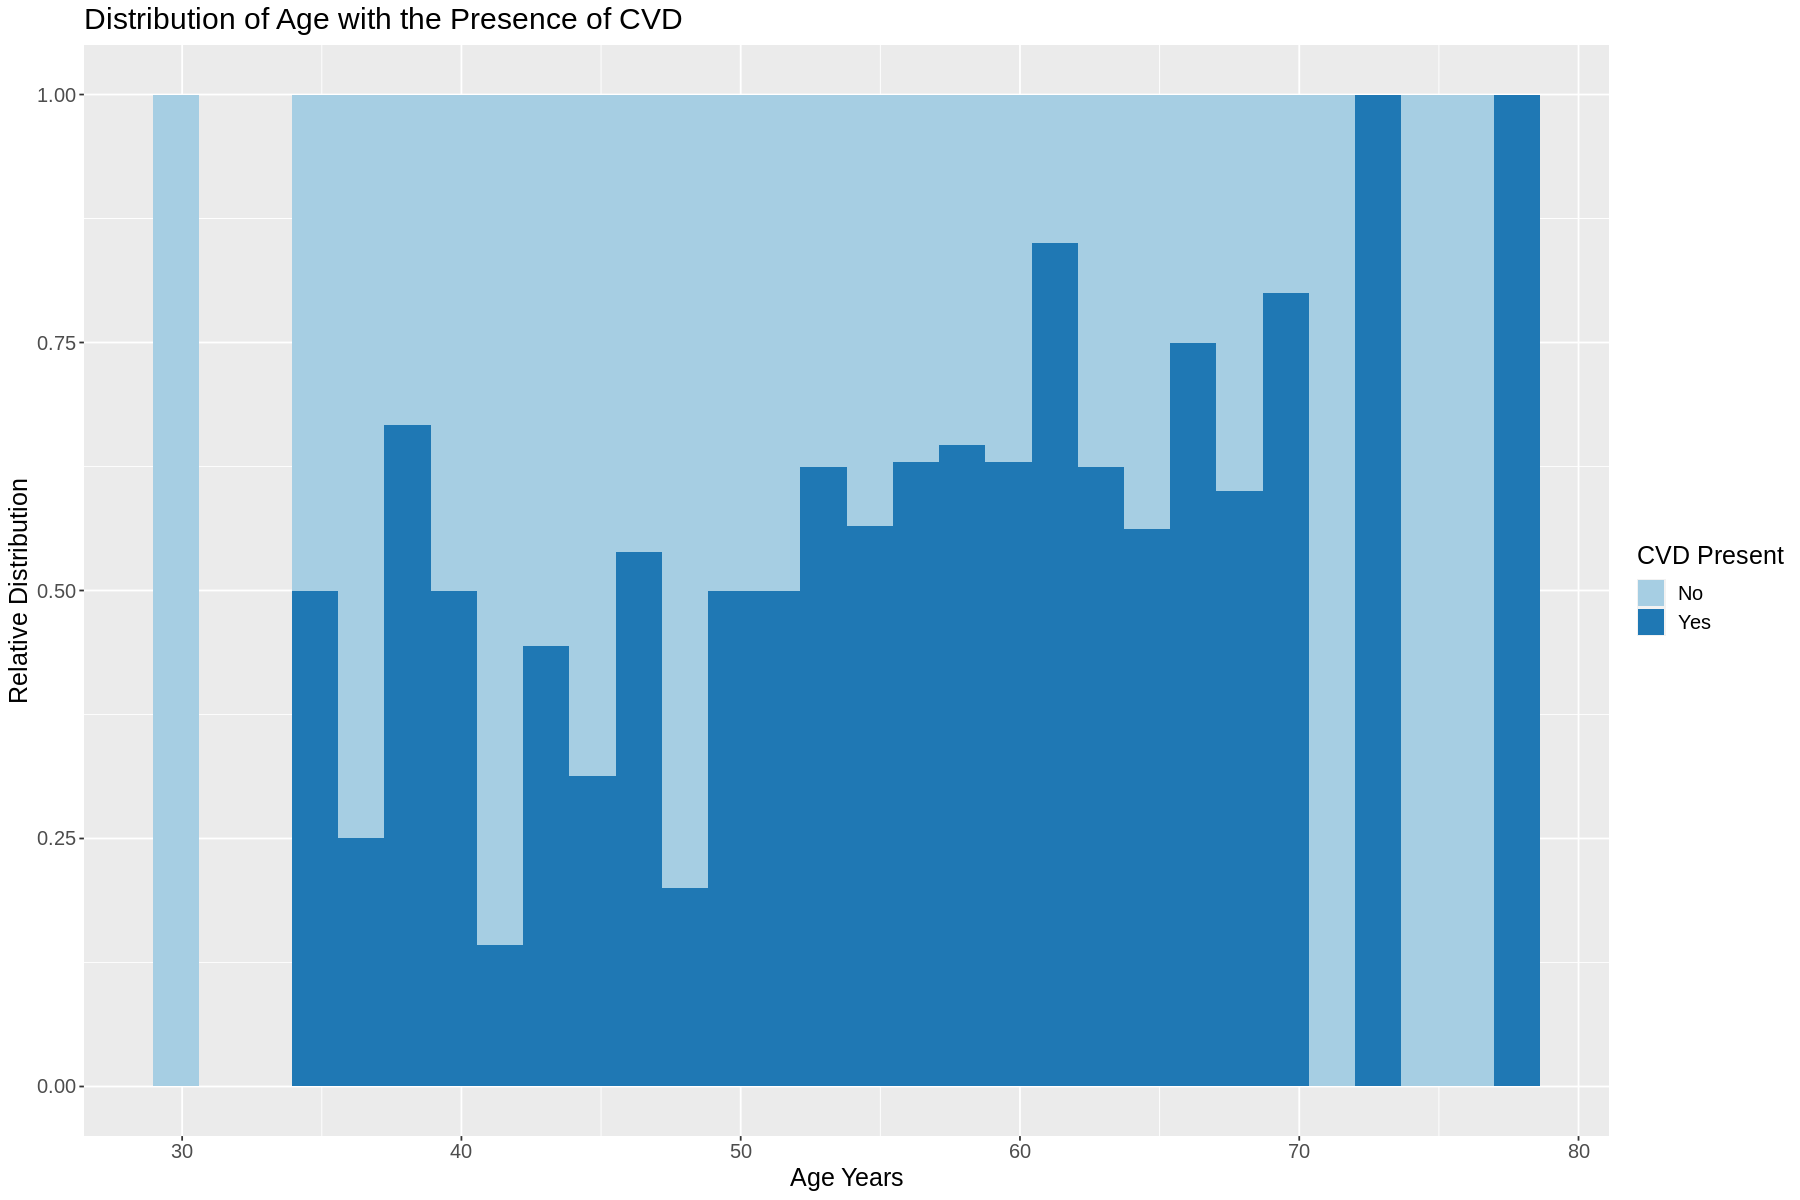

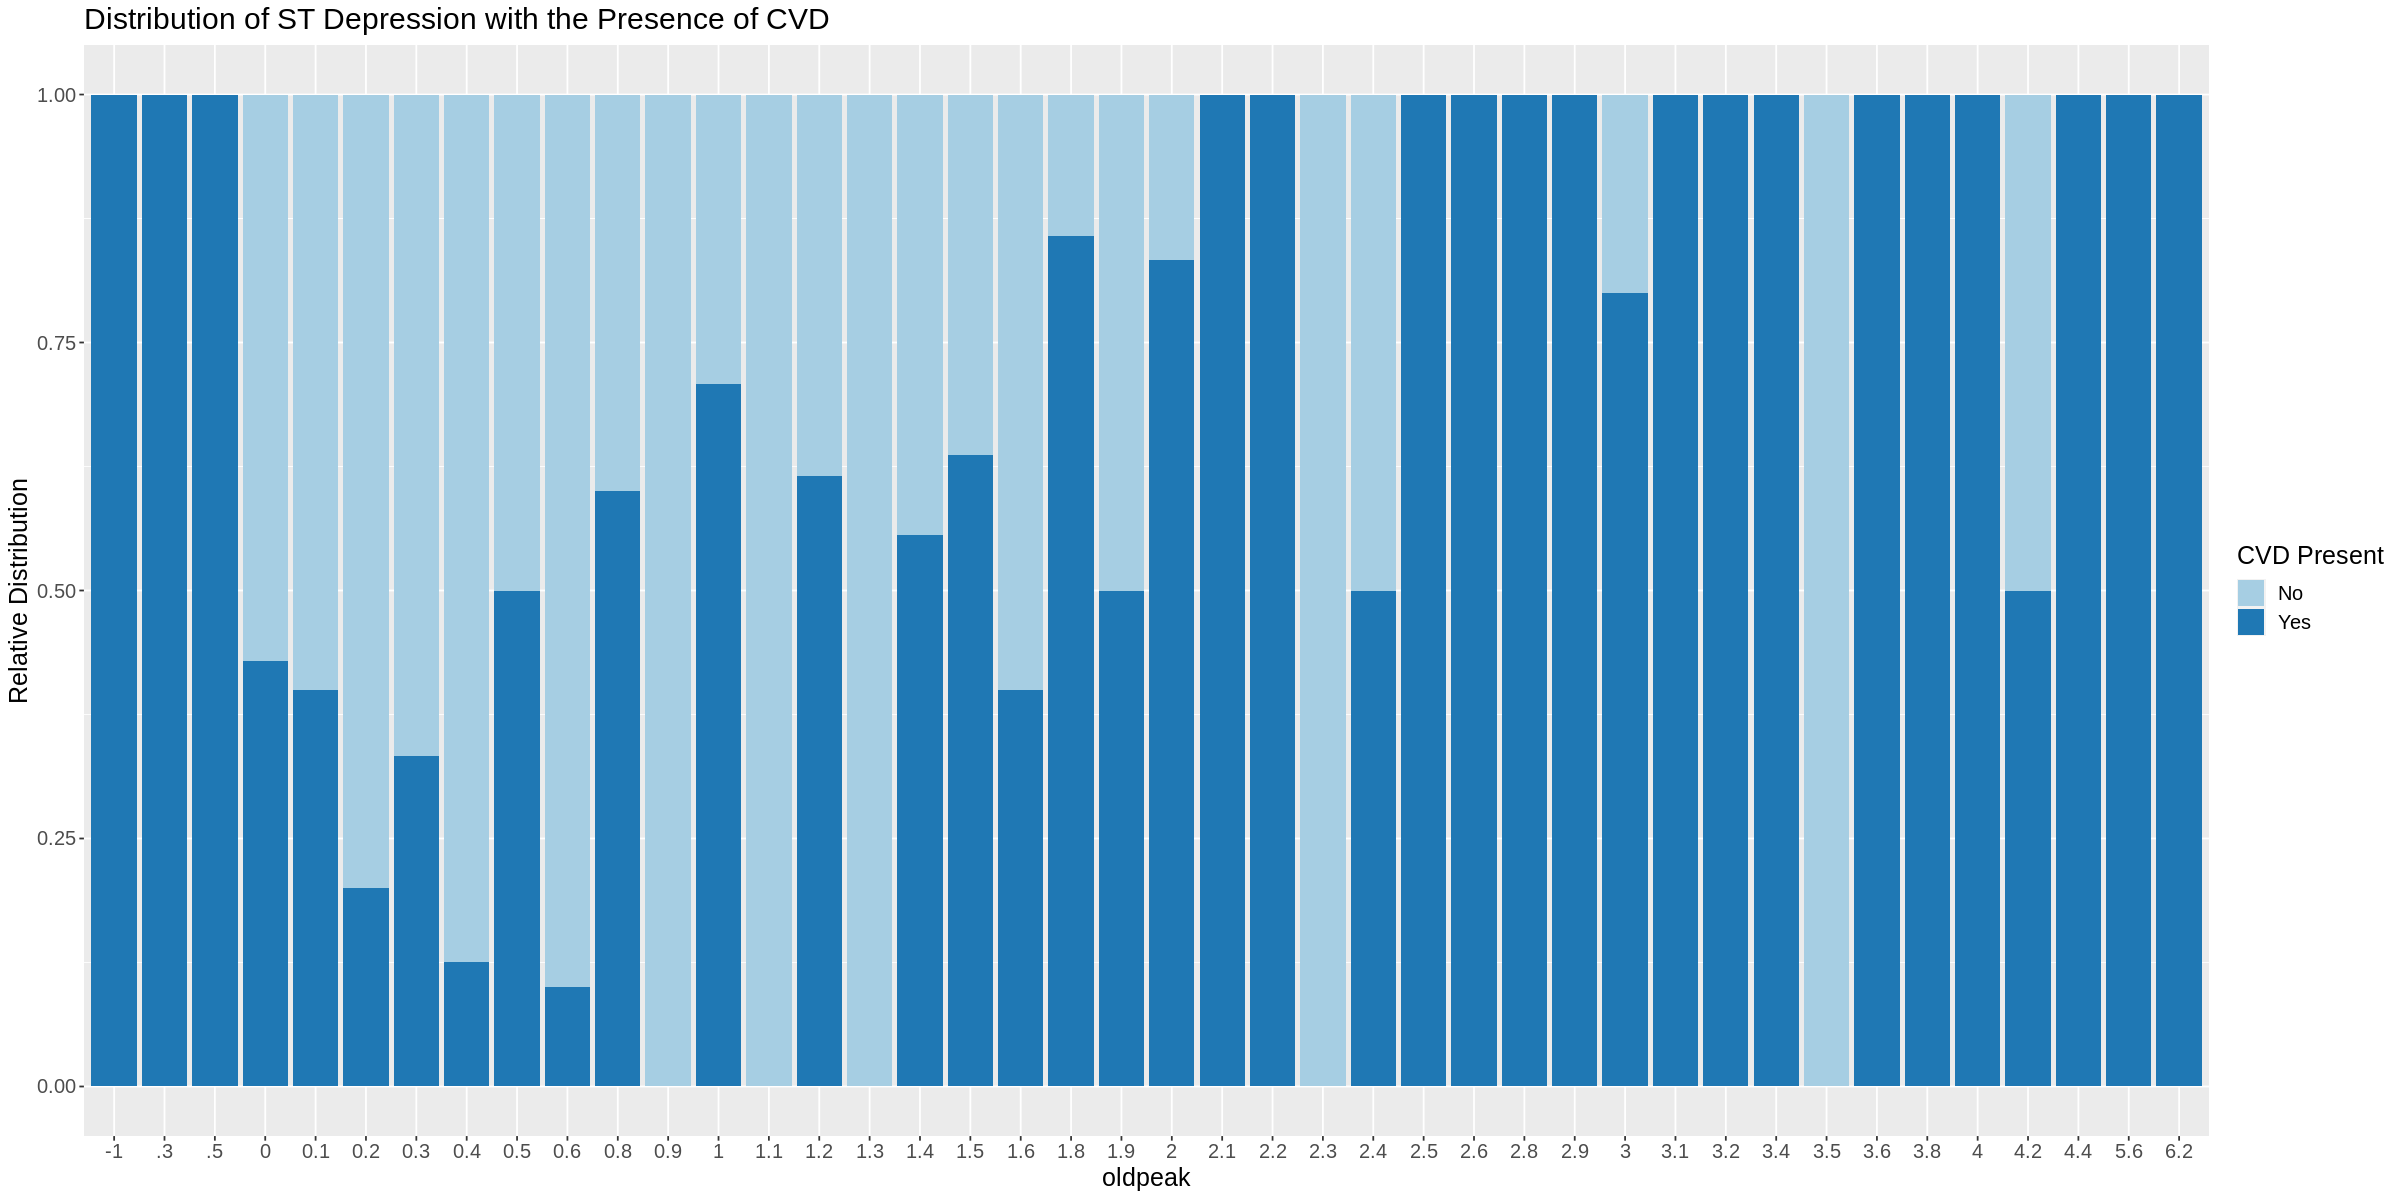

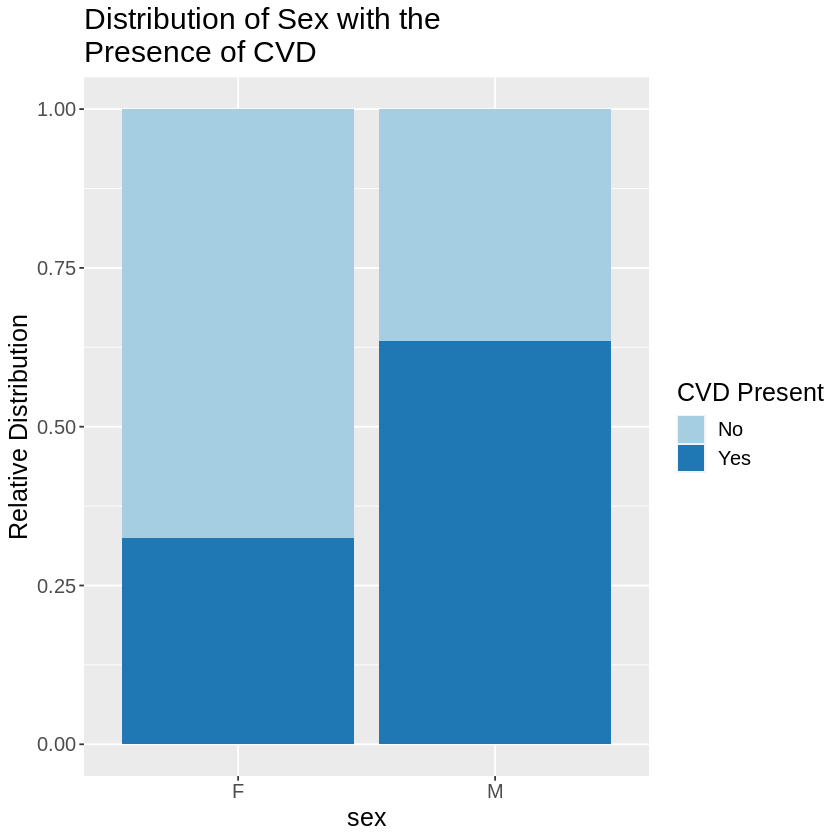

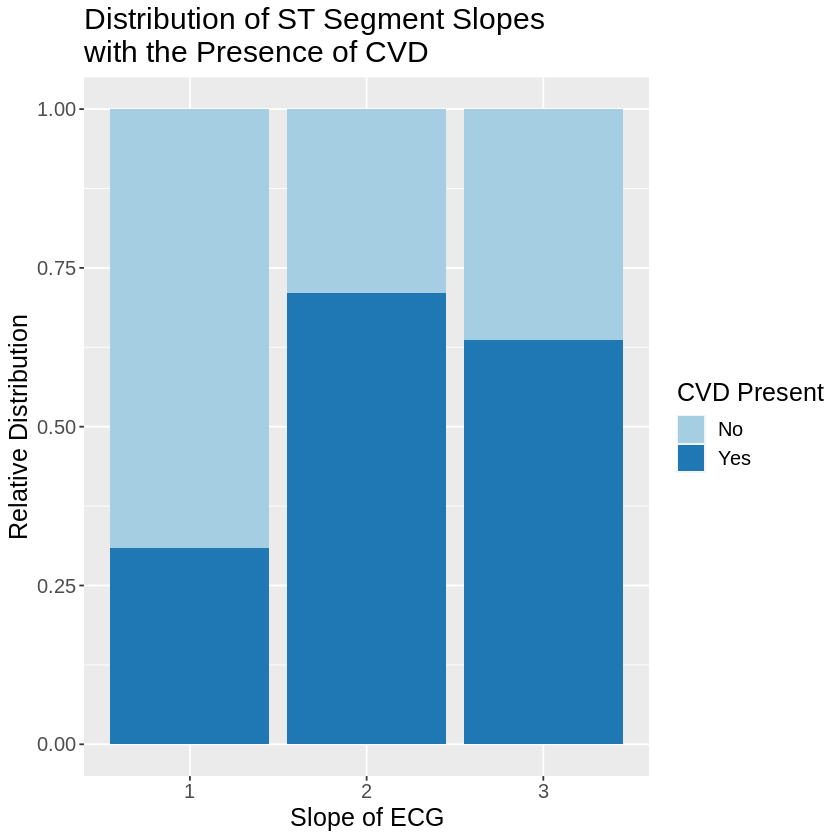

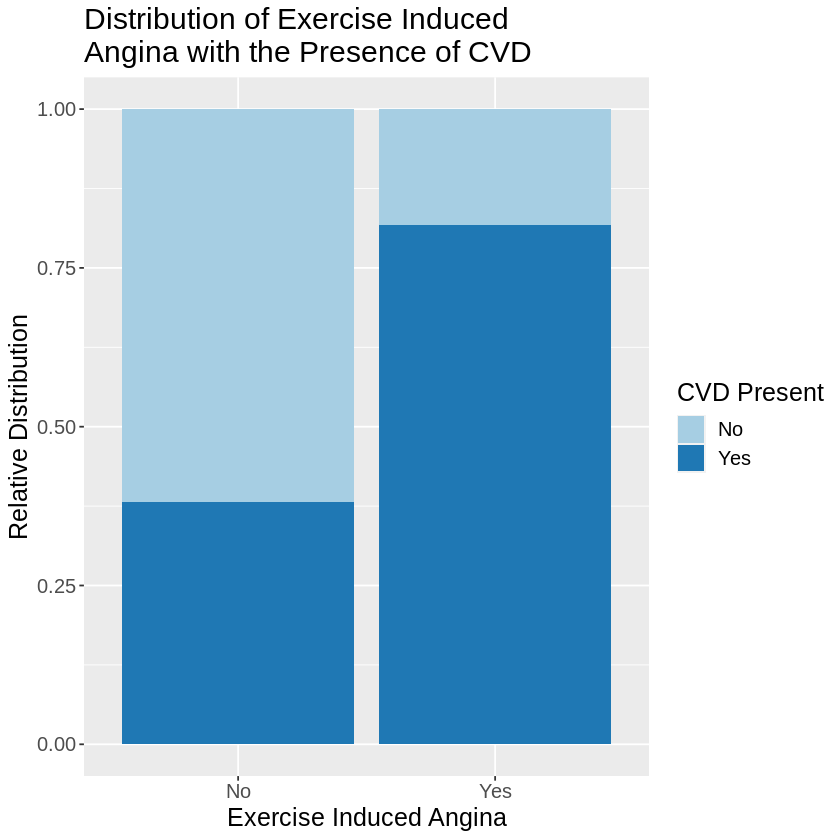

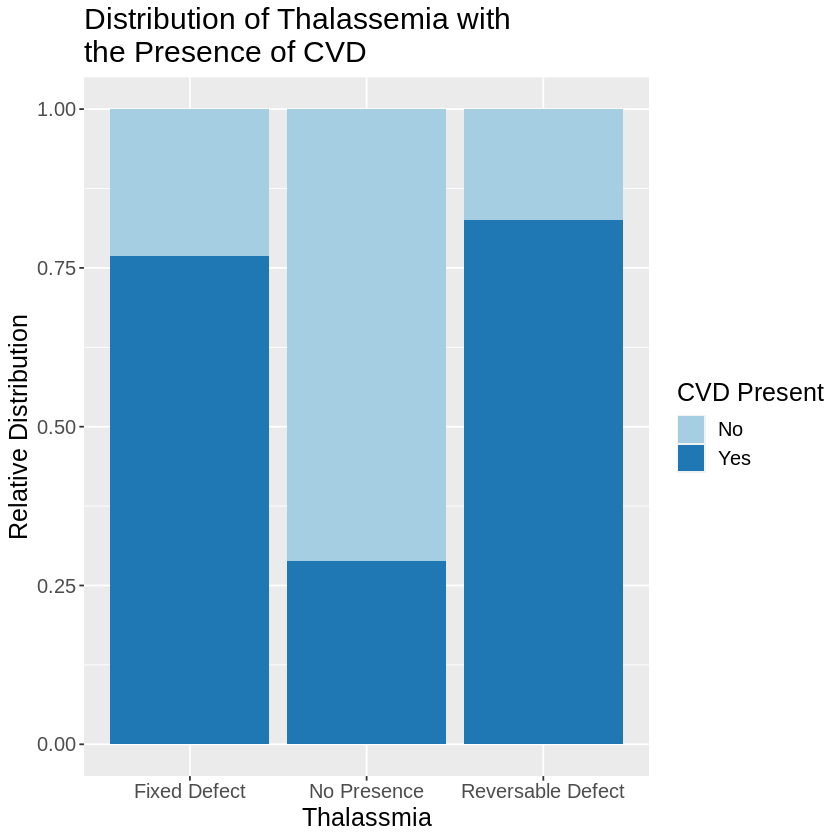

In [8]:
#Age versus presence of CVD. Here we see that Age correlates with the presence of CVD.
options(repr.plot.width = 15, repr.plot.height = 10)
age_vs_pred <- training_data |>
    ggplot(aes(x = age, fill = as_factor(presence_of_cvd))) +
    geom_histogram(position = "fill") + 
    labs(x = "Age Years", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Age with the Presence of CVD") +
    scale_fill_brewer(palette = 'Paired')
age_vs_pred

#ST depression versus presence of CVD. Here we see that there is a certain range of ST depression (0.5 to 1.8) that has the least presence of CVD.
options(repr.plot.width = 20, repr.plot.height = 10)
st_depression_plot <- ggplot(training_data, aes(x = st_depression, fill = as_factor(presence_of_cvd))) +
    geom_bar(position = "fill") + 
    labs(x = "oldpeak", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of ST Depression with the Presence of CVD") +
    scale_fill_brewer(palette = 'Paired')
st_depression_plot

#Sex versus presence of CVD. Here we see that the relative presence of CVD is different for each sex.
options(repr.plot.width = 7, repr.plot.height = 7)
sex_plot <- ggplot(training_data, aes(x = sex, fill = as_factor(presence_of_cvd))) +
    geom_bar(position = "fill") + 
    labs(x = "sex", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Sex with the  \nPresence of CVD") +
    scale_fill_brewer(palette = 'Paired')
sex_plot

#ST slope versus presence of CVD. Here we see that slope > 1 have increased presence of CVD.
st_segment_slope_plot <- ggplot(training_data, aes(x = st_segment_slope, fill = as_factor(presence_of_cvd))) +
    geom_bar(position = "fill") + 
    labs(x = "Slope of ECG", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of ST Segment Slopes  \nwith the Presence of CVD") +
    scale_fill_brewer(palette = 'Paired')
st_segment_slope_plot

#Exercise induced angina versus presence of CVD. Here we see that presence of exercise induced angina has a significantly higher presence of CVD.
exercise_induced_angina_plot <- ggplot(training_data, aes(x = exercise_induced_angina, fill = as_factor(presence_of_cvd))) +
    geom_bar(position = "fill") + 
    labs(x = "Exercise Induced Angina", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Exercise Induced \nAngina with the Presence of CVD") +
    scale_fill_brewer(palette = 'Paired')
exercise_induced_angina_plot

#Thalassemia versus presence of CVD. Here we see that the presence of any form of thalassemia correlates with higher presence of CVD.
thalassemia_plot <- ggplot(training_data, aes(x = thalassemia, fill = as_factor(presence_of_cvd))) +
    geom_bar(position = "fill") + 
    labs(x = "Thalassmia", y = "Relative Distribution", fill = "CVD Present") + theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Thalassemia with  \nthe Presence of CVD") +
    scale_fill_brewer(palette = 'Paired')
thalassemia_plot

### Methodology

The classifier we'll build will be a classification model using K-Nearest Neighbors (KNN). We will use all the columns in our tidied data set (except for the predicted vector) as our predictors. The best way to visualize the accuracy of classifier would be by producing a confusion matrix. From the confusion matrix we would be able to calculate values such as proportions of true/false positives and negatives.

### Expected Outcomes and Significance

We expect our classifier to have a significantly higher accuracy than the baseline of our majority classifier (>55%).

If our classifier is quite accurate, then our model could have practical uses in facilities that lack sophisticated machines, have low physician-to-patient ratios, and shortage of specialized medical expertise. A simple diagnostic circuit (that outputs a value for each of our predictor vectors) could be implemented in medicial facilities. CVDs would be more efficiently detected, and patients could have their conditions treated sooner.

Developing our classifier, we could run into future issues such as deciding on which K values to use, number of vfolds, whether to add more predictor variables, or even consider if such a classifier would be limited in its accuracy.